⬆️ Upload 'enriched_worst_200_movies.csv'


Saving enriched_worst_200_movies.csv to enriched_worst_200_movies (2).csv
✅ Columns: ['primaryTitle', 'startYear', 'averageRating', 'numVotes', 'genres', 'tmdb_id', 'budget', 'revenue', 'release_date', 'popularity', 'vote_average', 'vote_count']
💣 Top 10 Flops by Flop Score:
                                    primaryTitle  startYear      budget  \
121                               The Ladykiller       2023   5404446.0   
18                                    Foodfight!       2012  65000000.0   
150                              United Passions       2014  30000000.0   
19                                     Dream.net       2009   3500000.0   
74   The Oogieloves in the Big Balloon Adventure       2012  20000000.0   
33                         The Cost of Deception       2021   2500000.0   
169                               Leonard Part 6       1987  24000000.0   
73                                  Pledge This!       2006   8300000.0   
102                         From Justin to Kelly 

<ipython-input-3-82943a8cb308>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_flops, x='flop_score', y='primaryTitle', palette='Reds_r')


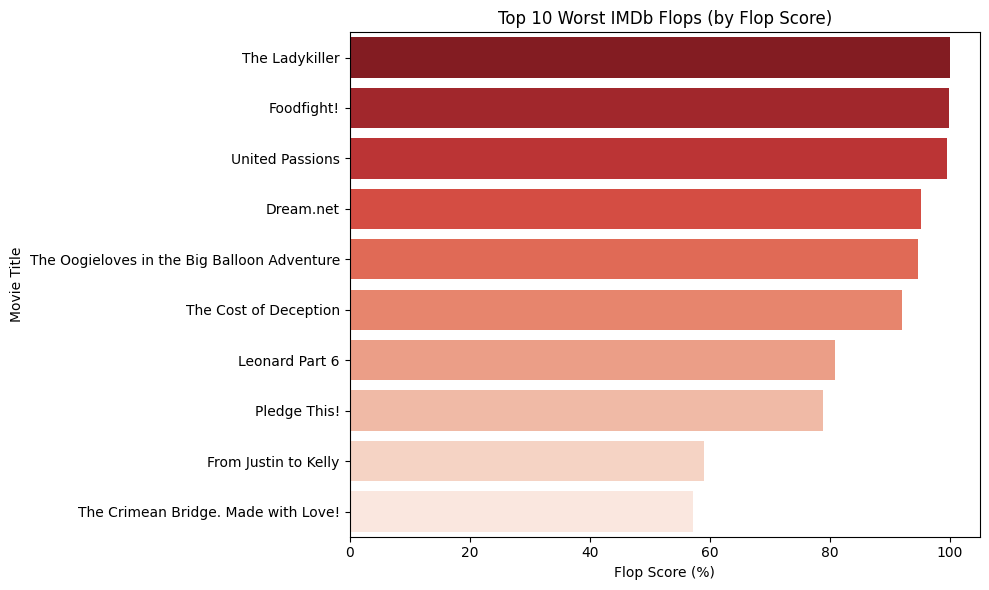

✅ Flop Score data saved to 'data/enriched_worst_200_with_flop_score.csv'


<Figure size 640x480 with 0 Axes>

In [3]:
# 🎬 IMDb Flop Score: Flop Metric + EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Upload merged data
print("⬆️ Upload 'enriched_worst_200_movies.csv'")
uploaded = files.upload()

# 📂 Load the dataset
df = pd.read_csv('enriched_worst_200_movies.csv')

# 📊 Clean and preview
print("✅ Columns:", df.columns.tolist())
df[['budget', 'revenue']] = df[['budget', 'revenue']].fillna(0)

# ✅ Convert to numeric (sometimes API returns strings)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# 💥 Define Flop Score
# Example: Positive score = bad flop; higher score = worse
df['flop_score'] = ((df['budget'] - df['revenue']) / df['budget']) * 100
df['flop_score'] = df['flop_score'].replace([np.inf, -np.inf], np.nan)

# 👀 Only consider rows with reasonable budget and revenue
flops = df[(df['budget'] > 1000000) & (df['revenue'] > 0)]

# 🔝 Top 10 worst flops
top_flops = flops.sort_values('flop_score', ascending=False).head(10)
print("💣 Top 10 Flops by Flop Score:")
print(top_flops[['primaryTitle', 'startYear', 'budget', 'revenue', 'flop_score']])

# 📈 Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=top_flops, x='flop_score', y='primaryTitle', palette='Reds_r')
plt.title("Top 10 Worst IMDb Flops (by Flop Score)")
plt.xlabel("Flop Score (%)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

# 💾 Save the new dataset
import os
os.makedirs('data', exist_ok=True)  # ✅ Ensure directory exists
flops.to_csv('data/enriched_worst_200_with_flop_score.csv', index=False)
print("✅ Flop Score data saved to 'data/enriched_worst_200_with_flop_score.csv'")


# 📊 Save visualization
os.makedirs('visuals', exist_ok=True)
plt.savefig('visuals/top_10_flops_chart.png', bbox_inches='tight')
plt.show()


### What is Flop Score?

Flop Score measures how much a movie lost based on its budget:

\[
\text{Flop Score} = \left(\frac{\text{budget} - \text{revenue}}{\text{budget}}\right) \times 100
\]

- A higher score means a bigger financial failure
- Only includes movies with a budget over $1M and known revenue
- We use a percentage to normalize across movie sizes
